In [156]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [157]:
import numpy as np
import pandas as pd

In [158]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [159]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [160]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [161]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [162]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [163]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [164]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [165]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
print('----')    
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


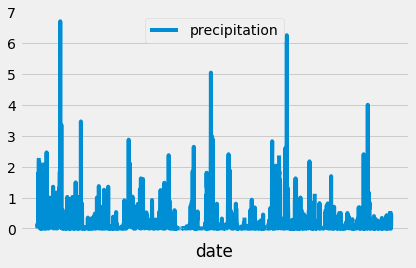

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
gdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= gdate).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip, columns=['date', 'precipitation'])
df.set_index('date', inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.tight_layout()
plt.xticks([])
plt.show()

In [167]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [168]:
# Design a query to show how many stations are available in this dataset?
totalStations = session.query(Station.station).count()
print(f"There are {totalStations} stations in this dataset")


There are 9 stations in this dataset


In [169]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
actStations = session.query(Measurement.station,
                    func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
actStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [170]:
print (f'Most active station ID: {actStations[0][0]}')

Most active station ID: USC00519281


In [171]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station, 
             func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)).\
            filter(Measurement.station == actStations[0][0]).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

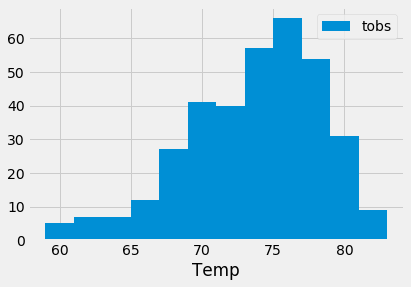

In [187]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
gdate = dt.datetime(2017, 8, 18) - dt.timedelta(days=365)
tobs = session.query(Measurement.tobs).\
        filter(Measurement.station == actStations[0][0]).\
        filter(Measurement.date >= gdate).\
        order_by(Measurement.tobs.desc()).all()

tobs = [i[0] for i in tobs]

plt.hist(tobs, bins=12, label='tobs')
plt.xlabel('Temp')
#plt.ylabel('Frequency')
plt.legend()
plt.show()
